In [1]:
# Binary Classification 
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from keras.optimizers import RMSprop,Adam
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils

from visual_callbacks import AccLossPlotter,  ConfusionMatrixPlotter

In [20]:
# load dataset
dataframe = pd.read_csv("KidneyStoneDataset.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:5120]
Y = dataset[:,5120]
#verileri normalize etmesem de sonuç değişmiyor
normalized_X = preprocessing.normalize(X) 
print(normalized_X)
print(Y)
print(X.shape)

[[7.12608925e-04 1.06891339e-03 1.18768154e-03 ... 1.44897148e-02
  1.60337008e-02 1.27081925e-02]
 [7.80435184e-04 7.80435184e-04 7.80435184e-04 ... 1.33788889e-03
  5.57453703e-04 2.22981481e-04]
 [4.57271592e-04 3.47526410e-03 9.69415775e-03 ... 9.14543184e-05
  9.14543184e-05 0.00000000e+00]
 ...
 [1.10275826e-02 1.13519233e-02 1.60548629e-02 ... 6.32464298e-03
  6.64898364e-03 8.59502763e-03]
 [3.76171777e-03 4.77448794e-03 5.20853230e-03 ... 7.66811700e-03
  6.36598392e-03 5.35321375e-03]
 [1.16057158e-02 4.15362460e-03 2.07681230e-03 ... 1.77139873e-02
  1.78361527e-02 1.79583181e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [5]:
model=Sequential()
model.add(Dense(32,input_dim=5120))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Activation('relu'))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('softmax'))

class_names = ['Healthy', 'Patient']
#plotter = ConfusionMatrixPlotter(X_val=X_test, classes=class_names, Y_val=y_test)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [6]:
X = np.array(normalized_X) 
y = np.array(Y)
n_splits=10
#split sayısı doğruluğu değiştirmiyor.
skf = StratifiedKFold(n_splits=n_splits,random_state=1, shuffle=True)
skf.get_n_splits(X, y)

#her bir 100 epoch için sonuçlar aynı çıkıyor ve loss'u hesaplayamıyor. 
for train_index, test_index in skf.split(X, y):
    # print(f"train {np.sum(train_index)} \t test: {np.sum(test_index)}") #check split index
    print(f"train (%) {np.sum(y[train_index])/len(train_index)} \t test(%): {np.sum(y[test_index])/len(test_index)}")
    cnn=model.fit(X[train_index,:], y[train_index], \
                  validation_data=(X[test_index,:], \
                  y[test_index]), epochs=10,batch_size=32, verbose=0)
    
    


train (%) 0.8232323232323232 	 test(%): 0.8260869565217391
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8241206030150754 	 test(%): 0.8181818181818182
train (%) 0.8190954773869347 	 test(%): 0.8636363636363636


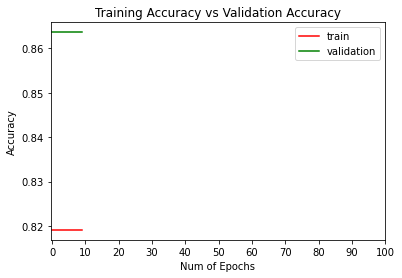

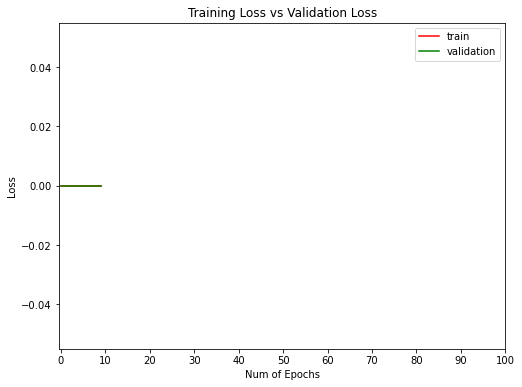

In [7]:
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 10))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

In [55]:
def plot_confusion_matrix(cm, names,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 32)                163872    
_________________________________________________________________
dropout_36 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_36 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_37 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_37 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 64)              

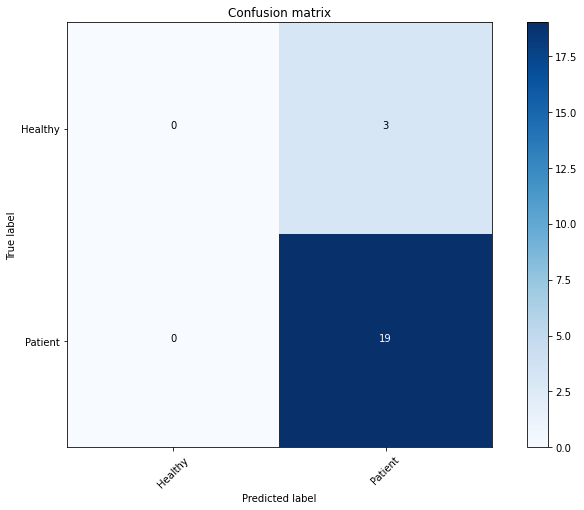

In [56]:
model.summary()

for train_index, test_index in skf.split(X, y):
    pred=model.predict(X[test_index,:])
    cm = confusion_matrix(y[test_index], pred)
    pred = np.argmax(pred,axis=1)

  
# Compute confusion matrix
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)




In [57]:

train_accuracy=0
test_accuracy=0
precision=0
recall=0
f1=0

for train_index, test_index in skf.split(X, y):
    train_preds = np.where(model.predict(X[train_index,:]) > 0.5, 1, 0)
    test_preds = np.where(model.predict(X[test_index,:]) > 0.5, 1, 0)
    train_accuracy = train_accuracy+accuracy_score(y[train_index], train_preds)
    test_accuracy =test_accuracy+ accuracy_score(y[test_index], test_preds)
    precision=precision+precision_score(y[test_index], test_preds)
    recall=recall+recall_score(y[test_index], test_preds)
    f1=f1+f1_score(y[test_index], test_preds)

    
 
avg_train=train_accuracy/n_splits
avg_test=test_accuracy/n_splits
avg_precision=precision/n_splits
avg_recall=recall/n_splits
avg_f1=f1/n_splits

print(f'Train Accuracy : {avg_train:.4f}')
print(f'Test Accuracy  : {avg_test:.4f}')


print('Precision: %f' % avg_precision)
print('Recall: %f' % avg_recall)
print('F1 score: %f' % avg_f1)

Train Accuracy : 0.8235
Test Accuracy  : 0.8235
Precision: 0.823518
Recall: 1.000000
F1 score: 0.903159


In [62]:
# example of evaluating a model with random oversampling and undersampling
#source: https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
#https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, cross_val_predict, TimeSeriesSplit
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NeighbourhoodCleaningRule, OneSidedSelection

X = np.array(normalized_X) 
y = np.array(Y)

#over = RandomOverSampler(sampling_strategy='minority')
over = SMOTE(sampling_strategy=0.3)
#under = RandomUnderSampler(sampling_strategy=0.4)
#under = TomekLinks()
#under = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
#under = NeighbourhoodCleaningRule(n_neighbors=7, threshold_cleaning=0.5)

#X, y = under.fit_resample(X, y)


Precision: 0.822
Recall: 0.822
F1 Score: 0.806
Confusion matrix
[[  9  30]
 [ 41 141]]


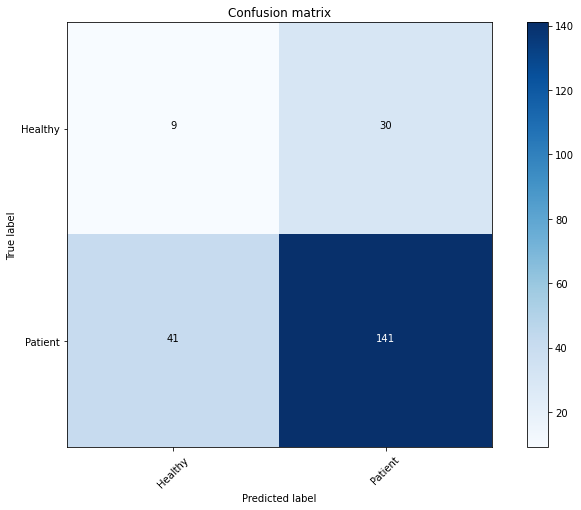

In [63]:
steps = [('o', over), ('m', DecisionTreeClassifier())] 
#steps = [('o', over), ('r', RandomForestClassifier(max_depth=2, random_state=1))] 
#steps = [('u', under),  ('r', RandomForestClassifier(max_depth=2, random_state=1))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
n_splits=5
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=100)
cv = StratifiedKFold(n_splits=n_splits,random_state=1,shuffle=True)
acc = cross_val_score(pipeline, X, y, scoring='precision', cv=cv, n_jobs=-1)
acc = mean(acc)
print('Precision: %.3f' % acc)
recall = cross_val_score(pipeline, X, y, scoring='recall', cv=cv, n_jobs=-1)
acc = mean(acc)
print('Recall: %.3f' % acc)
scores = cross_val_score(pipeline, X, y, scoring='f1', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

y_pred = cross_val_predict(pipeline, X, y, cv=cv)
cm = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)


Counter({1: 182, 0: 39})
Counter({1: 213, 0: 39})
train (%) 0.845771144278607 	 test(%): 0.8431372549019608
train (%) 0.845771144278607 	 test(%): 0.8431372549019608
train (%) 0.8465346534653465 	 test(%): 0.84
train (%) 0.8465346534653465 	 test(%): 0.84
train (%) 0.8415841584158416 	 test(%): 0.86
Confusion matrix
[[ 0  7]
 [ 0 43]]
Train Accuracy : 0.8452
Test Accuracy  : 0.8453
Precision: 0.845255
Recall: 1.000000
F1 score: 0.916121


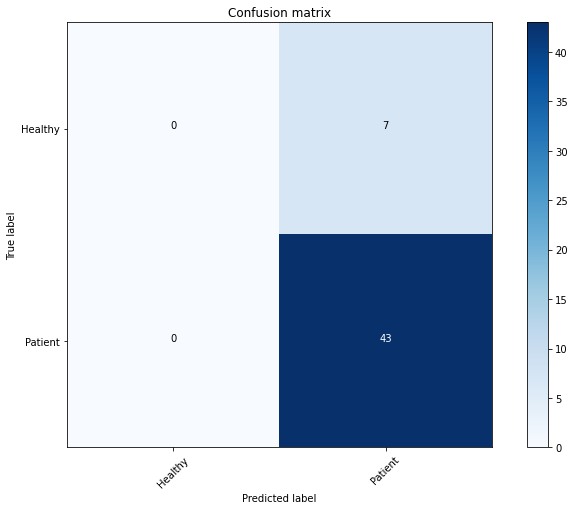

In [64]:
# Undersample and plot imbalanced dataset with the Edited Nearest Neighbor rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, OneSidedSelection
from imblearn.over_sampling import RandomOverSampler

from matplotlib import pyplot
from numpy import where

X = np.array(normalized_X) 
y = np.array(Y)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
#undersample = RandomUnderSampler(sampling_strategy=0.4)
#over = RandomOverSampler(sampling_strategy=0.3)
#undersample = EditedNearestNeighbours(n_neighbors=2)
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
#undersample = TomekLinks()

X, y = undersample.fit_resample(X, y)
#X, y = over.fit_resample(X, y)

counter = Counter(y)
print(counter)
n_splits=5
#split sayısı doğruluğu değiştirmiyor.
skf = StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=True)
skf.get_n_splits(X, y)

#her bir 100 epoch için sonuçlar aynı çıkıyor ve loss'u hesaplayamıyor. 
for train_index, test_index in skf.split(X, y):
    # print(f"train {np.sum(train_index)} \t test: {np.sum(test_index)}") #check split index
    print(f"train (%) {np.sum(y[train_index])/len(train_index)} \t test(%): {np.sum(y[test_index])/len(test_index)}")
    cnn=model.fit(X[train_index,:], y[train_index], \
                  validation_data=(X[test_index,:], \
                  y[test_index]), epochs=10,batch_size=8, verbose=0)
    pred=model.predict(X[test_index,:])
    cm = confusion_matrix(y[test_index], pred)
    pred = np.argmax(pred,axis=1)
# Compute confusion matrix

np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm, class_names)


train_accuracy=0
test_accuracy=0
precision=0
recall=0
f1=0

for train_index, test_index in skf.split(X, y):
    train_preds = np.where(model.predict(X[train_index,:]) > 0.5, 1, 0)
    test_preds = np.where(model.predict(X[test_index,:]) > 0.5, 1, 0)
    train_accuracy = train_accuracy+accuracy_score(y[train_index], train_preds)
    test_accuracy =test_accuracy+ accuracy_score(y[test_index], test_preds)
    precision=precision+precision_score(y[test_index], test_preds)
    recall=recall+recall_score(y[test_index], test_preds)
    f1=f1+f1_score(y[test_index], test_preds)   
 
avg_train=train_accuracy/n_splits
avg_test=test_accuracy/n_splits
avg_precision=precision/n_splits
avg_recall=recall/n_splits
avg_f1=f1/n_splits

print(f'Train Accuracy : {avg_train:.4f}')
print(f'Test Accuracy  : {avg_test:.4f}')


print('Precision: %f' % avg_precision)
print('Recall: %f' % avg_recall)
print('F1 score: %f' % avg_f1)

In [188]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)
from PIL import Image
from scipy import misc

import os

from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# DEEP LEARNING IMPORTS
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv1D, Activation, Dropout, Flatten, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [207]:
X = np.array(normalized_X) 
y = np.array(Y)

#over = RandomOverSampler(sampling_strategy=0.4)
#over = SMOTE(sampling_strategy=0.3)
#under = RandomUnderSampler(sampling_strategy=0.4)
#under = TomekLinks()
#under = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
under = NeighbourhoodCleaningRule(n_neighbors=7, threshold_cleaning=0.5)

X, y = under.fit_resample(X, y)
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state = 101, 
                                                   test_size=0.2)

n_timesteps, n_features, n_outputs = train_x.shape[0], train_x.shape[1], train_y.shape[0]
print(n_timesteps, n_features, n_outputs)
def cnn_model(size, num_cnn_layers):
    
   
    model=Sequential()
    model.add(Dense(32,input_dim=5120))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.2))

    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation('softmax'))


    class_names = ['Healthy', 'Patient']
#plotter = ConfusionMatrixPlotter(X_val=X_test, classes=class_names, Y_val=y_test)

    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
    
    #print(model.summary())
    
    return model

108 5120 108


In [208]:
IMAGE_SIZE = X.shape
model = cnn_model(IMAGE_SIZE, 2)
model.summary()

Model: "sequential_391"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1815 (Dense)           (None, 32)                163872    
_________________________________________________________________
dropout_1372 (Dropout)       (None, 32)                0         
_________________________________________________________________
activation_1320 (Activation) (None, 32)                0         
_________________________________________________________________
dense_1816 (Dense)           (None, 32)                1056      
_________________________________________________________________
dropout_1373 (Dropout)       (None, 32)                0         
_________________________________________________________________
activation_1321 (Activation) (None, 32)                0         
_________________________________________________________________
dense_1817 (Dense)           (None, 64)             

In [209]:
#set early stopping criteria
pat = 5 #this is the number of epochs with no improvment after which the training will stop
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

#define a function to fit the model
def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS, BATCH_SIZE):
    model = None
    model = cnn_model(IMAGE_SIZE,2)
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_split=0.1, callbacks=[early_stopping, model_checkpoint]) 
             
    print("Val Score: ", model.evaluate(val_x, val_y))
    print("Predict Score: ", model.evaluate(val_x, val_y))
    pred=model.predict(val_x)
    cm = confusion_matrix(val_y, pred)
    pred = np.argmax(pred,axis=1)
    # Compute confusion matrix

    np.set_printoptions(precision=2)
    print('Confusion matrix')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm, class_names)

Training on Fold:  1
Epoch 1/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6250
Epoch 00001: val_loss improved from inf to 0.00000, saving model to fas_mnist_1.h5
3/3 [==============================] - 1s 199ms/step - loss: 0.0000e+00 - acc: 0.6552 - val_loss: 0.0000e+00 - val_acc: 0.7000
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.5938
Epoch 00002: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - acc: 0.6552 - val_loss: 0.0000e+00 - val_acc: 0.7000
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6875
Epoch 00003: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - acc: 0.6552 - val_loss: 0.0000e+00 - val_acc: 0.7000
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.7188
Epoch 00004: val_loss did not improve from 0.00000


Confusion matrix
[[0 6]
 [0 5]]


Training on Fold:  4
Epoch 1/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.7188
Epoch 00001: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 90ms/step - loss: 0.0000e+00 - acc: 0.6897 - val_loss: 0.0000e+00 - val_acc: 0.8000
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.7188
Epoch 00002: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - acc: 0.6897 - val_loss: 0.0000e+00 - val_acc: 0.8000
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6562
Epoch 00003: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - acc: 0.6897 - val_loss: 0.0000e+00 - val_acc: 0.8000
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6250
Epoch 00004: val_loss did not improve from 0.00000

Confusion matrix
[[0 5]
 [0 6]]


Training on Fold:  7
Epoch 1/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.7812
Epoch 00001: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - acc: 0.6782 - val_loss: 0.0000e+00 - val_acc: 0.9000
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6875
Epoch 00002: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - acc: 0.6782 - val_loss: 0.0000e+00 - val_acc: 0.9000
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6562
Epoch 00003: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - acc: 0.6782 - val_loss: 0.0000e+00 - val_acc: 0.9000
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6250
Epoch 00004: val_loss did not improve from 0.00000

Confusion matrix
[[0 4]
 [0 7]]


Training on Fold:  10
Epoch 1/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6875
Epoch 00001: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 85ms/step - loss: 0.0000e+00 - acc: 0.6437 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6562
Epoch 00002: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - acc: 0.6437 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.5312
Epoch 00003: val_loss did not improve from 0.00000
3/3 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - acc: 0.6437 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/20
1/3 [=========>....................] - ETA: 0s - loss: 0.0000e+00 - acc: 0.6875
Epoch 00004: val_loss did not improve from 0.0000

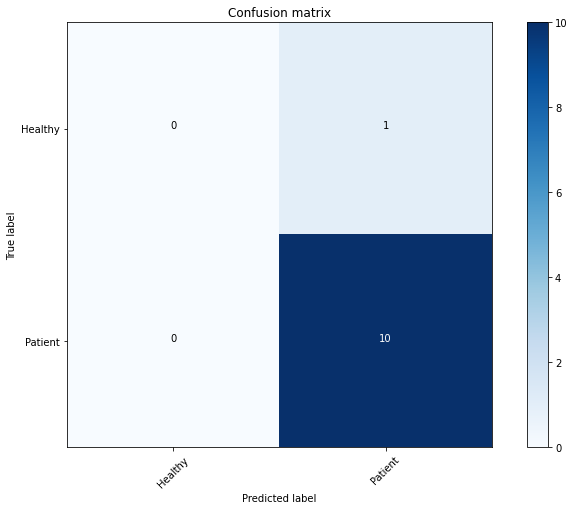

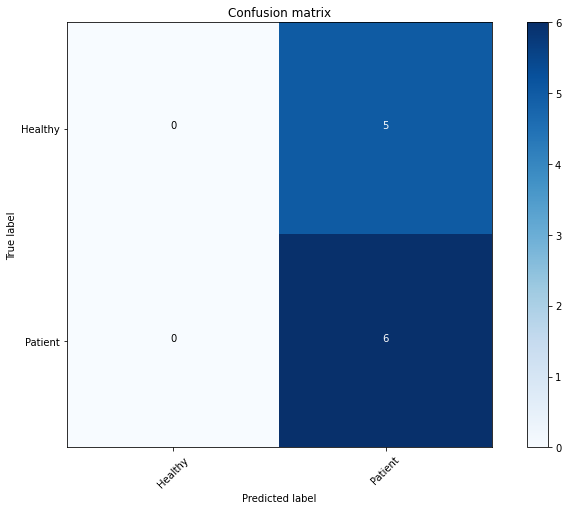

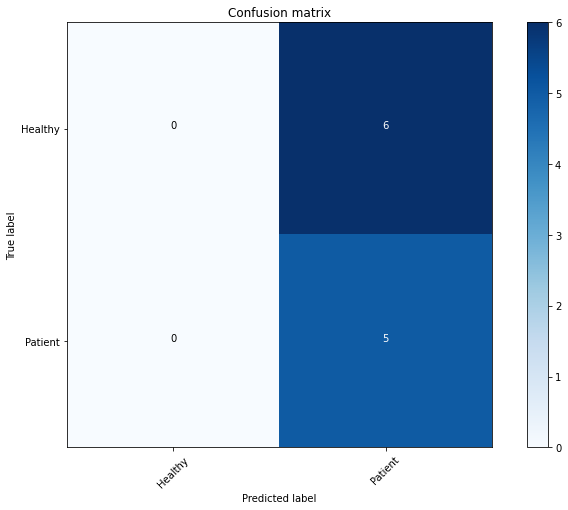

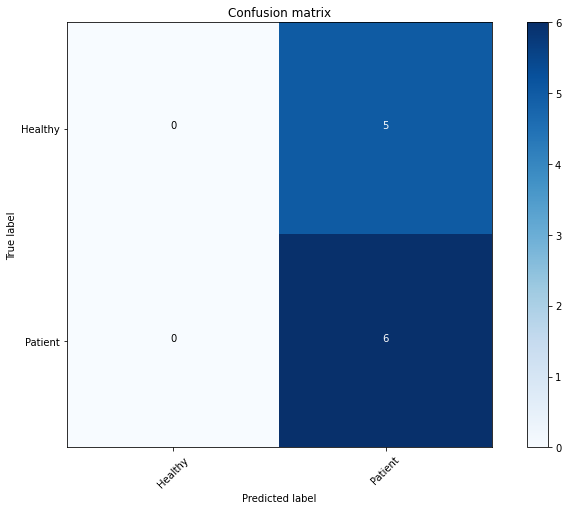

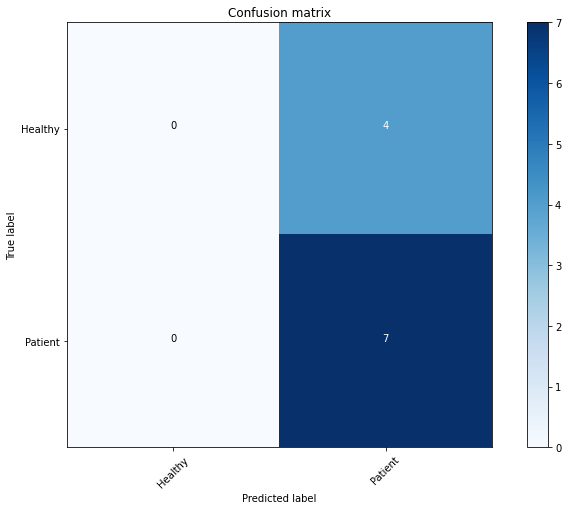

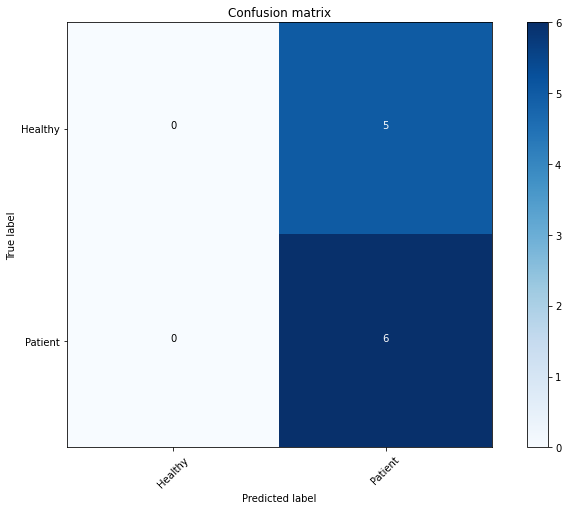

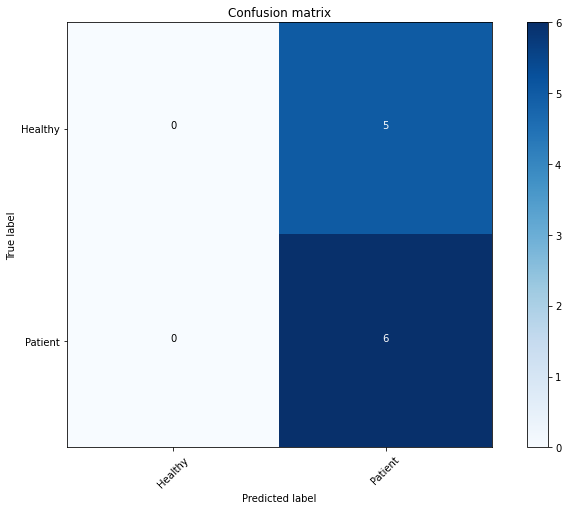

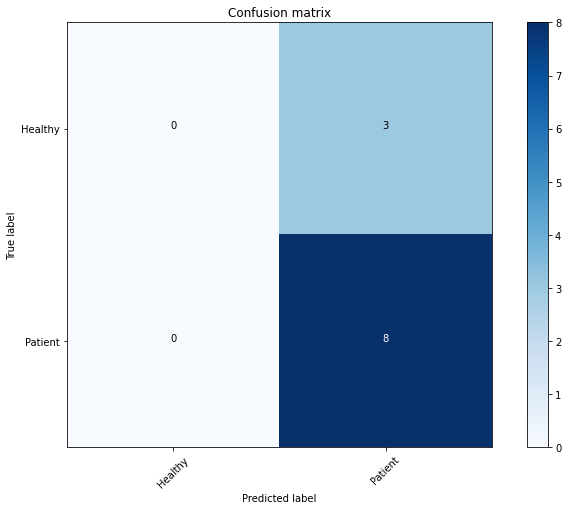

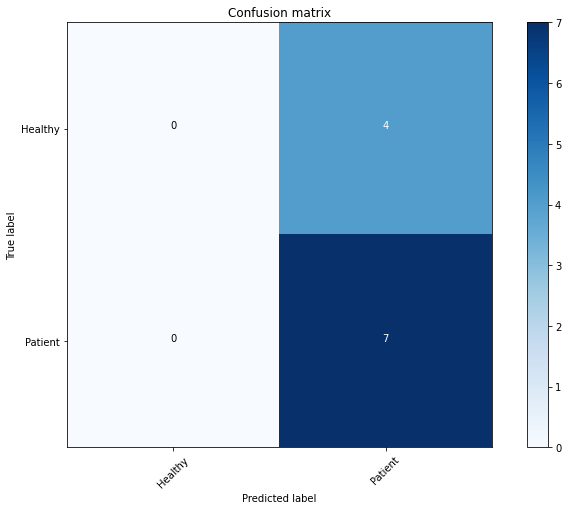

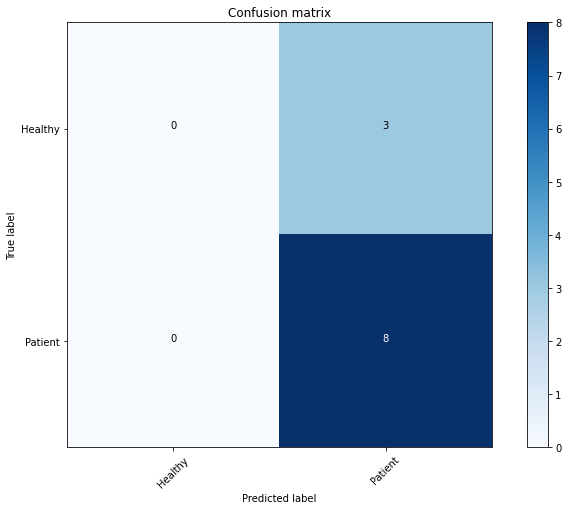

In [210]:
n_folds=10
epochs=20
batch_size=32

#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(train_x, train_y, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")
